# Objective

For this project, we will be using datasets by IMDB on episode, rating and all titles. Datasets can be found here:
- Episode dataset: [episode.tsv](https://datasets.imdbws.com/title.episode.tsv.gz)
- Ratings dataset: [rating.tsv](https://datasets.imdbws.com/title.ratings.tsv.gz)
- Titles dataset: [everything.tsv](https://datasets.imdbws.com/title.basics.tsv.gz)

We will try to answer these questions with the datasets:
- Which are the top 50 episodes of all time?
- Which are the most frequent genres for TV Series and episodes?
- Do these genres feature significantly in the top 50 episodes of all time? How about the top 5 episode?
- Which are the top 50 movies of all time?
- Which are the most frequent genres for Movies?
- Do these genres feature significantly in the top 50 movies of all times? How about the top 5 movies?

In [3]:
%cd D:\Python Projects\Imdb

D:\Python Projects\Imdb


In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data sets in python.

In [6]:
rating = pd.read_csv('rating.tsv', sep = '\t')
epi = pd.read_csv('episode.tsv', sep = '\t')


In [7]:
all1 = pd.read_csv('everything.tsv', sep = '\t')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1519
1,tt0000002,6.3,184
2,tt0000003,6.6,1165
3,tt0000004,6.3,113
4,tt0000005,6.2,1874


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948913 entries, 0 to 948912
Data columns (total 3 columns):
tconst           948913 non-null object
averageRating    948913 non-null float64
numVotes         948913 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.7+ MB


In [10]:
epi.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [11]:
all1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
all1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979872 entries, 0 to 5979871
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 410.6+ MB


# Data cleaning

Let us start by cleaning the data. First, we will clean the **'rating'** data set.

### Rating data set cleaning

Here's a data dictionary for the rating data:
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

In [13]:
rating.describe()

,averageRating,numVotes
count,948913.000000,9.489130e+05
mean,6.905744,9.670780e+02
std,1.400782,1.562746e+04
min,1.000000,5.000000e+00
25%,6.100000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,2.108887e+06


In [14]:
print(rating.numVotes.min())

5


In [15]:
diff = rating.numVotes.max() - rating.numVotes.min()
print(diff)

2108882


We can see that the difference between maximum and minimum number of votes is vast. In order to make sure that less number of votes don't skew the data, we will remove all the rows with total votes less than 1000.

Also, we will rename the column names.

In [16]:
rating.columns = ["tconst", "avg_rating", "votes"]
rating.columns

Index(['tconst', 'avg_rating', 'votes'], dtype='object')

Removing rows with votes < 1000 

In [17]:
c_prev = len(rating.votes)
print(c_prev)
rating = rating.loc[rating['votes'] > 1000]
print(len(rating))

948913
50176


We are now left with only ~50000 values.

### Episode data set cleaning

Here's the data dictionary for the episode data set:
- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

Counting number of NaN values.

In [18]:
epi.describe()

,tconst,parentTconst,seasonNumber,episodeNumber
count,4158227,4158227,4158227,4158227
unique,4158227,123492,198,15519
top,tt4621704,tt0058796,1,\N
freq,1,11065,1949957,903554


In [19]:
epi.columns = ['tconst', 'p_tconst', 'season', 'episode']

In [20]:
epi = epi.replace('\\N', '0.00001')


In [21]:
epi.head()

,tconst,p_tconst,season,episode
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,0.00001,0.00001
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


Converting columns to float.

In [22]:
epi['season'] = epi['season'].astype(float)

In [23]:
epi['episode'] = epi['episode'].astype(float)

In [24]:
epi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158227 entries, 0 to 4158226
Data columns (total 4 columns):
tconst      object
p_tconst    object
season      float64
episode     float64
dtypes: float64(2), object(2)
memory usage: 126.9+ MB


In [25]:
print(len(epi))

4158227


In [26]:
epi = epi[(epi['season'] != 0.00001) | (epi['episode'] != 0.00001)]

In [27]:
print(len(epi))

3254673


In [28]:
epi.head()

,tconst,p_tconst,season,episode
0,tt0041951,tt0041038,1.0,9.0
1,tt0042816,tt0989125,1.0,17.0
3,tt0043426,tt0040051,3.0,42.0
4,tt0043631,tt0989125,2.0,16.0
5,tt0043693,tt0989125,2.0,8.0


We have successfully converted the required columns to float and also removed missing or corrupted data.

### Everything data set data cleaning

Here's the data dictionary for all1 data set:
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

We will be removing the originalTitle column from the data set and changing the column names for easier selection.

In [29]:
all1 = all1.drop('originalTitle', axis = 1)

In [30]:
all1.columns = ['tconst', 'type', 'title', 'adult', 'start', 'end', 'runtime', 'genres']

In [31]:
all1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979872 entries, 0 to 5979871
Data columns (total 8 columns):
tconst     object
type       object
title      object
adult      int64
start      object
end        object
runtime    object
genres     object
dtypes: int64(1), object(7)
memory usage: 365.0+ MB


Most of the columns in this data set are not in the correct format. We will start by changing required columns to their right format for data analysis.

As mentioned in the data dictionary, this dataframe also has missing values denoted by '\N'. We will first replace or drop all these values.

In [32]:
all1.head()

,tconst,type,title,adult,start,end,runtime,genres
0,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [33]:
all1.tail()

,tconst,type,title,adult,start,end,runtime,genres
5979867,tt9916848,tvEpisode,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
5979868,tt9916850,tvEpisode,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
5979869,tt9916852,tvEpisode,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
5979870,tt9916856,short,The Wind,0,2015,\N,27,Short
5979871,tt9916880,tvEpisode,Horrid Henry Knows It All,0,2014,\N,\N,"Animation,Comedy,Family"


In [34]:
all1.replace('\\N', '0.000000001')

,tconst,type,title,adult,start,end,runtime,genres
0,tt0000001,short,Carmencita,0,1894,0.000000001,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,0.000000001,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,0.000000001,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,0.000000001,0.000000001,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,0.000000001,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,0,1894,0.000000001,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,0.000000001,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,0.000000001,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,0,1894,0.000000001,45,Romance
9,tt0000010,short,Exiting the Factory,0,1895,0.000000001,1,"Documentary,Short"


In [35]:
all1.head()

,tconst,type,title,adult,start,end,runtime,genres
0,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Many values in the 'end' column were NA, hence we will drop that column.

In [36]:
#all1['runtime'] = all1['runtime'].astype(float)
all1 = all1.drop('end', axis = 1)
all1.head()

,tconst,type,title,adult,start,runtime,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"


In [37]:
all_clean = all1[all1['runtime'] != '\\N']
all_clean = all_clean[all_clean['genres'] != '\\N']
all_clean.head()

,tconst,type,title,adult,start,runtime,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short


In [38]:
print(len(all1))
print(len(all_clean))

5979872
1726755


We have removed all the rows in 'runtime' and 'genres' column which had missing values. We will use this data set later. Right now, we will be using all1 data set.

## Splitting the genres column in to individual genres

In [39]:
all_clean = all_clean.dropna(subset = ['genres'])


In [40]:
all_clean.head()


,tconst,type,title,adult,start,runtime,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short


In [41]:
split_genres = pd.DataFrame(all_clean['genres'].str.split(',').tolist(), columns = ['gen1', 'gen2', 'gen3'])
split_genres.head()

,gen1,gen2,gen3
0,Documentary,Short,None
1,Animation,Short,None
2,Animation,Comedy,Romance
3,Comedy,Short,None
4,Short,None,None


In [42]:
split_genres.shape

(1726750, 3)

In [43]:
all_clean.shape

(1726750, 7)

Joining split_genres dataframe with all_clean

In [44]:
all_clean = all_clean.join(split_genres)
all_clean.head()

,tconst,type,title,adult,start,runtime,genres,gen1,gen2,gen3
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",Animation,Comedy,Romance
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",Short,None,None
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short,Short,Sport,None


In [45]:
all_clean.head(10) #delete

,tconst,type,title,adult,start,runtime,genres,gen1,gen2,gen3
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",Animation,Comedy,Romance
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",Short,None,None
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short,Short,Sport,None
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport",Documentary,Short,None
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short",Romance,None,None
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance,Documentary,Short,None
9,tt0000010,short,Exiting the Factory,0,1895,1,"Documentary,Short",Documentary,Short,None
10,tt0000011,short,Akrobatisches Potpourri,0,1895,1,"Documentary,Short",Action,Documentary,Short


In [46]:
x = all_clean[all_clean['type'] == 'tvEpisode'] #delete
x

,tconst,type,title,adult,start,runtime,genres,gen1,gen2,gen3
41237,tt0041951,tvEpisode,The Tenderfeet,0,1949,30,Western,Adventure,Sci-Fi,None
42085,tt0042816,tvEpisode,Othello,0,1950,135,Drama,Comedy,Fantasy,Mystery
42157,tt0042889,tvEpisode,The Tragedy of King Richard II/II,0,1950,145,Drama,Crime,Drama,None
42682,tt0043426,tvEpisode,Coriolanus,0,1951,60,Drama,Horror,Sci-Fi,None
42887,tt0043631,tvEpisode,The Life of King Henry V,0,1951,133,Drama,Action,Adventure,None
43337,tt0044093,tvEpisode,The Three Musketeers,0,1950,60,Drama,Drama,None,None
45166,tt0045960,tvEpisode,King Lear,0,1953,75,"Drama,History,Music",Talk-Show,None,None
45338,tt0046135,tvEpisode,Number Three,0,1953,80,Drama,Action,Adventure,None
45352,tt0046150,tvEpisode,Othello,0,1953,84,Drama,Action,Comedy,Crime
46039,tt0046855,tvEpisode,A Christmas Carol,0,1954,60,"Adventure,Drama,Family",Drama,None,None


In [47]:
#all_clean = all_clean.drop('genres', axis = 1)
all_clean.head()

,tconst,type,title,adult,start,runtime,genres,gen1,gen2,gen3
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",Animation,Comedy,Romance
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",Short,None,None
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short,Short,Sport,None


In [48]:
genres_1 = split_genres.gen1.value_counts()
genres_1.head()

Comedy         333274
Drama          323598
Documentary    224549
Action         118270
Animation       91719
Name: gen1, dtype: int64

In [49]:
genres_2 = split_genres.gen2.value_counts()
genres_3 = split_genres.gen3.value_counts()


In [50]:
genres_2.head()

Short      309086
Drama      154880
Romance     69642
Comedy      59318
Family      58093
Name: gen2, dtype: int64

In [51]:
genres_3.head()

Short      91007
Drama      44496
Romance    41967
Family     39532
Mystery    30561
Name: gen3, dtype: int64

In [52]:
genres_all = pd.concat([genres_1, genres_2, genres_3], axis = 1, sort = False)

In [53]:
genres_all.head()

,gen1,gen2,gen3
Comedy,333274,59318.0,21516.0
Drama,323598,154880.0,44496.0
Documentary,224549,38961.0,4093.0
Action,118270,NaN,NaN
Animation,91719,29528.0,20901.0


Including the index in the dataframe

In [54]:
genres_all['index1'] = genres_all.index

Replacing all NaN values with 0

In [55]:
genres_all = genres_all.fillna(0)

In [56]:
genres_all

,gen1,gen2,gen3,index1
Comedy,333274,59318.0,21516.0,Comedy
Drama,323598,154880.0,44496.0,Drama
Documentary,224549,38961.0,4093.0,Documentary
Action,118270,0.0,0.0,Action
Animation,91719,29528.0,20901.0,Animation
Short,89926,309086.0,91007.0,Short
Crime,73044,33576.0,7695.0,Crime
Adult,65303,218.0,0.0,Adult
Reality-TV,62228,20351.0,7947.0,Reality-TV
Adventure,60244,42820.0,39.0,Adventure


Adding all the genres.

In [57]:
genres_all['gen_sum'] = genres_all.gen1 + genres_all.gen2 + genres_all.gen3
genres_all.head()

,gen1,gen2,gen3,index1,gen_sum
Comedy,333274,59318.0,21516.0,Comedy,414108.0
Drama,323598,154880.0,44496.0,Drama,522974.0
Documentary,224549,38961.0,4093.0,Documentary,267603.0
Action,118270,0.0,0.0,Action,118270.0
Animation,91719,29528.0,20901.0,Animation,142148.0


# Merging the data sets

In all the data sets, i.e. rating, all1 and epi, the 'tconst' column is a unique identifier. In order to identify the top 100 tv shows, we will be using this column to merge all the data sets.

Before that, we will remove the unnecessay rows (data corresponding to anything which is not a tvshow or tvepisode) from our data sets.

Since the epi data set contains only data on tvshows, we will use it to merge with rating and then with all1.

### These are the three cleaned data sets:
- rating
- epi
- all1

**Note: Data cleaning is a continuous process which we will continue doing through out the project. Example: After merging, deleting rows, etc.**

In [58]:
rating.columns

Index(['tconst', 'avg_rating', 'votes'], dtype='object')

In [59]:
epi.columns

Index(['tconst', 'p_tconst', 'season', 'episode'], dtype='object')

In [60]:
all1.columns

Index(['tconst', 'type', 'title', 'adult', 'start', 'runtime', 'genres'], dtype='object')

The epi dataframe contains data about all the episodes and their parent series where as rating dataframe contains data about rating of each episode.

We will merge these two dataframes to create a new dataframe.

In [61]:
epi_rating = rating.merge(epi, on = 'tconst', how = 'left')
print(len(epi_rating))

50176


In [62]:
epi_rating.head()

,tconst,avg_rating,votes,p_tconst,season,episode
0,tt0000001,5.8,1519,NaN,NaN,NaN
1,tt0000003,6.6,1165,NaN,NaN,NaN
2,tt0000005,6.2,1874,NaN,NaN,NaN
3,tt0000008,5.6,1622,NaN,NaN,NaN
4,tt0000010,6.9,5404,NaN,NaN,NaN


As we can see, there are many rows which contain NaN values. We will need to remove them.

### Cleaning the merged dataframe

In [63]:
epi_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50176 entries, 0 to 50175
Data columns (total 6 columns):
tconst        50176 non-null object
avg_rating    50176 non-null float64
votes         50176 non-null int64
p_tconst      11416 non-null object
season        11416 non-null float64
episode       11416 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ MB


In [64]:
epi_rating.dtypes

tconst         object
avg_rating    float64
votes           int64
p_tconst       object
season        float64
episode       float64
dtype: object

In [65]:
epi_rating_notnull = epi_rating[epi_rating['p_tconst'].notnull()]

In [66]:
epi_rating_notnull.head()

,tconst,avg_rating,votes,p_tconst,season,episode
3748,tt0059753,7.7,4504,tt0060028,1.0,0.0
3920,tt0061027,7.8,4041,tt0060028,1.0,3.0
4687,tt0066931,6.9,1856,tt1466074,1.0,3.0
4688,tt0066932,7.7,3030,tt1466074,1.0,1.0
4689,tt0066933,7.6,1988,tt1466074,1.0,0.0


## Now we have a list of all the episodes from IMDb with:
- average user rating
- more than 1000 number of votes
- episode number
- episode identifier (tconst)
- serial identifier (p_tconst)
- no missing values

Though we have kept the rows with number of votes above 1000, the difference between maximum and minimum number of votes is big. If we sort the data in descending order based solely on average rating, TV episodes with less number of votes might skew the data in their favour.
We will have to address this issue before deciding the top 50 TV episodes of all time.

## Rating methodology

Due to the vast difference in the minimum and maximum number of votes, we will multiply the **number of user votes** with **average rating value**.

If an episode has high rating value, but low number of votes, it would still be ranked lower than say, an episode with a lower rating but high number of votes.

The higher this value is, better is the episode.

**Note: We cannot sort only by number of user votes as that will ignore the average user rating.**

In [67]:
final_rating = epi_rating_notnull.copy()

In [68]:
final_rating['rating'] = (final_rating['avg_rating']*final_rating['votes'])

In [69]:
final_rating.head()

,tconst,avg_rating,votes,p_tconst,season,episode,rating
3748,tt0059753,7.7,4504,tt0060028,1.0,0.0,34680.8
3920,tt0061027,7.8,4041,tt0060028,1.0,3.0,31519.8
4687,tt0066931,6.9,1856,tt1466074,1.0,3.0,12806.4
4688,tt0066932,7.7,3030,tt1466074,1.0,1.0,23331.0
4689,tt0066933,7.6,1988,tt1466074,1.0,0.0,15108.8


In [70]:
final_rating.sort_values(by = 'rating', ascending = False)

,tconst,avg_rating,votes,p_tconst,season,episode,rating
42666,tt4283088,9.9,180922,tt0944947,6.0,9.0,1791127.8
46744,tt6027912,7.6,193766,tt0944947,8.0,3.0,1472621.6
42667,tt4283094,9.9,125419,tt0944947,6.0,10.0,1241648.1
46746,tt6027916,6.1,171074,tt0944947,8.0,5.0,1043551.4
36229,tt2301451,9.9,102313,tt0903747,5.0,14.0,1012898.7
46743,tt6027908,7.9,114650,tt0944947,8.0,2.0,905735.0
46491,tt5924366,7.6,116620,tt0944947,8.0,1.0,886312.0
46747,tt6027920,4.2,207598,tt0944947,8.0,6.0,871911.6
41474,tt3866850,9.9,84489,tt0944947,5.0,8.0,836441.1
35470,tt2178784,9.9,83508,tt0944947,3.0,9.0,826729.2


The above list contains all the episodes of all TV series. We want to find top 50 episodes, one from each TV series.

In order to find the top 50 episodes from **each** serial, we will make a new dataframe of the top rated episodes. 

In [71]:
parent =  final_rating['p_tconst'].unique()

In [72]:
top_episode = {}
for item in parent:
    selection = final_rating[final_rating['p_tconst'] == item]
    sorted1 = selection.sort_values('rating', ascending = False)
    top1 = sorted1.iloc[0]
    top_episode[item] = top1    

In [73]:
len(top_episode)

431

In [74]:
import pprint

pprint prints dictionary in a easy to read format

In [75]:
pprint.pprint(top_episode)

{'tt0046593': tconst        tt0091566
avg_rating          7.5
votes              1058
p_tconst      tt0046593
season               30
episode              11
rating             7935
Name: 8130, dtype: object,
 'tt0047708': tconst        tt0508235
avg_rating          7.4
votes              1389
p_tconst      tt0047708
season                1
episode               1
rating          10278.6
Name: 21495, dtype: object,
 'tt0052520': tconst        tt0734683
avg_rating          9.1
votes              4529
p_tconst      tt0052520
season                1
episode               8
rating          41213.9
Name: 23691, dtype: object,
 'tt0056751': tconst        tt0562828
avg_rating          8.4
votes              1206
p_tconst      tt0056751
season                1
episode               1
rating          10130.4
Name: 21892, dtype: object,
 'tt0060028': tconst        tt0708455
avg_rating          9.3
votes              3783
p_tconst      tt0060028
season                1
episode              28
rat

 'tt1830617': tconst        tt1940498
avg_rating          8.1
votes              1641
p_tconst      tt1830617
season                1
episode               1
rating          13292.1
Name: 34049, dtype: object,
 'tt1836037': tconst        tt4237512
avg_rating          9.3
votes              1044
p_tconst      tt1836037
season                4
episode               1
rating           9709.2
Name: 42533, dtype: object,
 'tt1837492': tconst        tt5174280
avg_rating          9.1
votes              6787
p_tconst      tt1837492
season                1
episode              13
rating          61761.7
Name: 44790, dtype: object,
 'tt1837642': tconst        tt3677306
avg_rating          9.5
votes              1263
p_tconst      tt1837642
season                3
episode              22
rating          11998.5
Name: 40840, dtype: object,
 'tt1839578': tconst        tt4128194
avg_rating          9.8
votes             10064
p_tconst      tt1839578
season                4
episode              11
ra

 'tt3322314': tconst        tt4179626
avg_rating          7.8
votes              3705
p_tconst      tt3322314
season                1
episode               1
rating            28899
Name: 42384, dtype: object,
 'tt3339966': tconst        tt3651920
avg_rating          7.6
votes              1437
p_tconst      tt3339966
season                1
episode               1
rating          10921.2
Name: 40782, dtype: object,
 'tt3398228': tconst        tt8266826
avg_rating          9.8
votes              6231
p_tconst      tt3398228
season                5
episode               6
rating          61063.8
Name: 49667, dtype: object,
 'tt3475734': tconst        tt3976236
avg_rating          8.1
votes              2895
p_tconst      tt3475734
season                1
episode               1
rating          23449.5
Name: 41746, dtype: object,
 'tt3487382': tconst        tt4180390
avg_rating          9.6
votes              1614
p_tconst      tt3487382
season                1
episode              22
ra

Name: 30883, dtype: object,
 'tt7016936': tconst        tt7062890
avg_rating          8.8
votes              2939
p_tconst      tt7016936
season                1
episode               1
rating          25863.2
Name: 48497, dtype: object,
 'tt7137906': tconst        tt8805244
avg_rating          9.5
votes              2076
p_tconst      tt7137906
season                1
episode               4
rating            19722
Name: 49995, dtype: object,
 'tt7221388': tconst        tt7521330
avg_rating          8.8
votes              1575
p_tconst      tt7221388
season                1
episode               1
rating            13860
Name: 49031, dtype: object,
 'tt7235466': tconst        tt7415864
avg_rating          8.5
votes              1058
p_tconst      tt7235466
season                1
episode               1
rating             8993
Name: 48942, dtype: object,
 'tt7335184': tconst        tt7360754
avg_rating          8.4
votes              2148
p_tconst      tt7335184
season                

We have all the top rated episodes from all the TV series in the dictionary top_episode. We will convert this dictionary to a dataframe using pd.DataFrame.from_dict method.

In [76]:
col = ['tconst', 'p_tconst', 'avg_rating', 'votes', 'season', 'rating']
top_df = pd.DataFrame.from_dict(top_episode, orient = 'index', columns = col)

In [77]:
top_df.head() #top episodes from all the serials

,tconst,p_tconst,avg_rating,votes,season,rating
tt0046593,tt0091566,tt0046593,7.5,1058,30.0,7935.0
tt0047708,tt0508235,tt0047708,7.4,1389,1.0,10278.6
tt0052520,tt0734683,tt0052520,9.1,4529,1.0,41213.9
tt0056751,tt0562828,tt0056751,8.4,1206,1.0,10130.4
tt0060028,tt0708455,tt0060028,9.3,3783,1.0,35181.9


In [78]:
top_df.tail()

,tconst,p_tconst,avg_rating,votes,season,rating
tt8772296,tt8135530,tt8772296,8.3,1190,1.0,9877.0
tt8910494,tt8910530,tt8910494,3.3,2316,1.0,7642.8
tt9253866,tt9253868,tt9253866,8.8,1005,1.0,8844.0
tt9475088,tt8918876,tt9475088,9.1,2047,1.0,18627.7
tt9561862,tt9781722,tt9561862,8.3,11004,1.0,91333.2


In [79]:
top_df.sort_values(by = 'rating', ascending = False)

,tconst,p_tconst,avg_rating,votes,season,rating
tt0944947,tt4283088,tt0944947,9.9,180922,6.0,1791127.8
tt0903747,tt2301451,tt0903747,9.9,102313,5.0,1012898.7
tt7366338,tt9166696,tt7366338,9.9,43056,1.0,426254.4
tt2085059,tt3973198,tt2085059,9.2,42021,2.0,386593.2
tt1520211,tt5164772,tt1520211,9.0,34164,7.0,307476.0
tt1475582,tt1942612,tt1475582,9.5,32263,2.0,306498.5
tt0475784,tt5229638,tt0475784,9.6,24213,1.0,232444.8
tt2560140,tt9906260,tt2560140,10.0,20284,3.0,202840.0
tt2861424,tt5218332,tt2861424,9.8,20135,3.0,197323.0
tt2356777,tt2790174,tt2356777,9.7,20222,1.0,196153.4


Merging top_df with all1 to get the additional data columns

In [80]:
topdf = pd.merge(left = top_df, right = all1, on = 'tconst', how = 'left')
top_df = topdf.copy()
top_df.head()

,tconst,p_tconst,avg_rating,votes,season,rating,type,title,adult,start,runtime,genres
0,tt0091566,tt0046593,7.5,1058,30.0,7935.0,tvEpisode,Mr. Boogedy,0,1986,46,"Adventure,Biography,Drama"
1,tt0508235,tt0047708,7.4,1389,1.0,10278.6,tvEpisode,Revenge,0,1955,26,"Comedy,Crime,Drama"
2,tt0734683,tt0052520,9.1,4529,1.0,41213.9,tvEpisode,Time Enough at Last,0,1959,25,"Fantasy,Horror,Mystery"
3,tt0562828,tt0056751,8.4,1206,1.0,10130.4,tvEpisode,An Unearthly Child,0,1963,23,"Adventure,Drama,Family"
4,tt0708455,tt0060028,9.3,3783,1.0,35181.9,tvEpisode,The City on the Edge of Forever,0,1967,50,"Action,Adventure,Sci-Fi"


Split genres columns in three columns

In [81]:
def split_genres(series_col):
    split_col = pd.DataFrame(series_col.str.split(',').tolist(), columns = ['gen1', 'gen2', 'gen3'])
    return split_col

In [82]:
top_df_genres = split_genres(top_df.genres)
top_df_genres.head()

,gen1,gen2,gen3
0,Adventure,Biography,Drama
1,Comedy,Crime,Drama
2,Fantasy,Horror,Mystery
3,Adventure,Drama,Family
4,Action,Adventure,Sci-Fi


In [83]:
top_df = top_df.join(top_df_genres)

In [84]:
top_df = top_df.drop(['genres'], axis = 1)
top_df.head()

,tconst,p_tconst,avg_rating,votes,season,rating,type,title,adult,start,runtime,gen1,gen2,gen3
0,tt0091566,tt0046593,7.5,1058,30.0,7935.0,tvEpisode,Mr. Boogedy,0,1986,46,Adventure,Biography,Drama
1,tt0508235,tt0047708,7.4,1389,1.0,10278.6,tvEpisode,Revenge,0,1955,26,Comedy,Crime,Drama
2,tt0734683,tt0052520,9.1,4529,1.0,41213.9,tvEpisode,Time Enough at Last,0,1959,25,Fantasy,Horror,Mystery
3,tt0562828,tt0056751,8.4,1206,1.0,10130.4,tvEpisode,An Unearthly Child,0,1963,23,Adventure,Drama,Family
4,tt0708455,tt0060028,9.3,3783,1.0,35181.9,tvEpisode,The City on the Edge of Forever,0,1967,50,Action,Adventure,Sci-Fi


In [85]:
top_50 = top_df.sort_values(by = 'rating', ascending = False)[:50] #top 50 episodes from serials

### These are the top 50 episodes from 50 serials.

In [86]:
top_50

,tconst,p_tconst,avg_rating,votes,season,rating,type,title,adult,start,runtime,gen1,gen2,gen3
138,tt4283088,tt0944947,9.9,180922,6.0,1791127.8,tvEpisode,Battle of the Bastards,0,2016,60,Action,Adventure,Drama
133,tt2301451,tt0903747,9.9,102313,5.0,1012898.7,tvEpisode,Ozymandias,0,2013,48,Crime,Drama,Thriller
408,tt9166696,tt7366338,9.9,43056,1.0,426254.4,tvEpisode,Vichnaya Pamyat,0,2019,72,Drama,History,None
214,tt3973198,tt2085059,9.2,42021,2.0,386593.2,tvEpisode,White Christmas,0,2014,73,Drama,Sci-Fi,Thriller
174,tt5164772,tt1520211,9.0,34164,7.0,307476.0,tvEpisode,The Day Will Come When You Won't Be,0,2016,46,Drama,Horror,Thriller
170,tt1942612,tt1475582,9.5,32263,2.0,306498.5,tvEpisode,A Scandal in Belgravia,0,2012,89,Crime,Drama,Mystery
116,tt5229638,tt0475784,9.6,24213,1.0,232444.8,tvEpisode,The Bicameral Mind,0,2016,90,Drama,Mystery,Sci-Fi
247,tt9906260,tt2560140,10.0,20284,3.0,202840.0,tvEpisode,Hero,0,2019,24,Action,Adventure,Animation
268,tt5218332,tt2861424,9.8,20135,3.0,197323.0,tvEpisode,The Ricklantis Mixup,0,2017,22,Adventure,Animation,Comedy
233,tt2790174,tt2356777,9.7,20222,1.0,196153.4,tvEpisode,Who Goes There,0,2014,56,Crime,Drama,Mystery


In [87]:
top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 138 to 16
Data columns (total 14 columns):
tconst        50 non-null object
p_tconst      50 non-null object
avg_rating    50 non-null float64
votes         50 non-null int64
season        50 non-null float64
rating        50 non-null float64
type          50 non-null object
title         50 non-null object
adult         50 non-null int64
start         50 non-null object
runtime       50 non-null object
gen1          50 non-null object
gen2          45 non-null object
gen3          35 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 5.9+ KB


In [88]:
top_50['start'] = top_50['start'].astype(int)
top_50['runtime'] = top_50['runtime'].astype(int)

In [89]:
top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 138 to 16
Data columns (total 14 columns):
tconst        50 non-null object
p_tconst      50 non-null object
avg_rating    50 non-null float64
votes         50 non-null int64
season        50 non-null float64
rating        50 non-null float64
type          50 non-null object
title         50 non-null object
adult         50 non-null int64
start         50 non-null int32
runtime       50 non-null int32
gen1          50 non-null object
gen2          45 non-null object
gen3          35 non-null object
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 5.5+ KB


In [90]:
top_50.describe()

,avg_rating,votes,season,rating,adult,start,runtime
count,50.000000,50.000000,50.000000,5.000000e+01,50.0,50.000000,50.000000
mean,9.196000,18025.940000,3.720000,1.700234e+05,0.0,2011.520000,59.160000
std,0.941332,28023.946944,3.516956,2.784156e+05,0.0,7.019623,47.687486
min,5.600000,6231.000000,1.000000,6.084780e+04,0.0,1989.000000,17.000000
25%,9.025000,7879.000000,1.000000,7.381423e+04,0.0,2009.250000,43.000000
50%,9.550000,9805.500000,3.000000,8.859010e+04,0.0,2014.000000,50.500000
75%,9.800000,14447.500000,5.000000,1.343616e+05,0.0,2016.000000,60.000000
max,10.000000,180922.000000,19.000000,1.791128e+06,0.0,2019.000000,359.000000


In [91]:
top_50.start.value_counts().sort_values()

1989    1
2007    1
2004    1
2009    1
1995    1
1994    1
1993    1
2001    1
2012    1
2008    2
2010    2
2011    2
2005    3
2018    3
2013    3
2017    3
2019    3
2015    6
2016    6
2014    8
Name: start, dtype: int64

In [92]:
oldest_episode = top_50[top_50['start'] == 1989]
oldest_episode

,tconst,p_tconst,avg_rating,votes,season,rating,type,title,adult,start,runtime,gen1,gen2,gen3
30,tt0278784,tt0098936,8.9,12897,1.0,114783.3,tvEpisode,Episode #1.1,0,1989,94,Crime,Drama,Mystery


In [93]:
latest_episode = top_50[top_50['start'] == 2019]
latest_episode

,tconst,p_tconst,avg_rating,votes,season,rating,type,title,adult,start,runtime,gen1,gen2,gen3
408,tt9166696,tt7366338,9.9,43056,1.0,426254.4,tvEpisode,Vichnaya Pamyat,0,2019,72,Drama,History,None
247,tt9906260,tt2560140,10.0,20284,3.0,202840.0,tvEpisode,Hero,0,2019,24,Action,Adventure,Animation
430,tt9781722,tt9561862,8.3,11004,1.0,91333.2,tvEpisode,Sonnie's Edge,0,2019,17,Animation,Comedy,Fantasy


The oldest episode in the top 50 movie list was released in 1989 where as the latest episodes were released in 2019.

Function to count the genres in the data set

In [94]:
def gen_count(g1, g2, g3):
    
    gn1 = g1.value_counts()
    gn2 = g2.value_counts()
    gn3 = g3.value_counts()
    combined = pd.concat([gn1,gn2,gn3], axis = 1, sort = False)
    combined = combined.fillna(0)
    combined['index1'] = combined.index
    combined['gen_sum'] = combined.gen1 + combined.gen2 + combined.gen3
    gen_sum = combined[['index1', 'gen_sum']]
    gen_sum = gen_sum.sort_values(by = 'gen_sum', ascending = False)
    return gen_sum

### Genre count for all the top episodes

In [95]:
gen_topdf = gen_count(top_df.gen1, top_df.gen2, top_df.gen3)
gen_topdf

,index1,gen_sum
Drama,Drama,305.0
Comedy,Comedy,124.0
Crime,Crime,120.0
Action,Action,111.0
Adventure,Adventure,86.0
Mystery,Mystery,83.0
Sci-Fi,Sci-Fi,47.0
Fantasy,Fantasy,47.0
Horror,Horror,32.0
Animation,Animation,30.0


### Genre count for top 50 episodes

In [96]:
gen_top50 = gen_count(top_50.gen1, top_50.gen2, top_50.gen3)
gen_top50

,index1,gen_sum
Drama,Drama,35.0
Crime,Crime,16.0
Action,Action,13.0
Adventure,Adventure,12.0
Mystery,Mystery,11.0
Comedy,Comedy,10.0
Horror,Horror,6.0
Fantasy,Fantasy,6.0
Animation,Animation,5.0
Thriller,Thriller,5.0


In [97]:
top_df.shape

(431, 14)

**The two *cleaned* data sets are:**
- **top_df:** All top episodes of all series (Total: 431)
- **top_50:** Top 50 episodes from top_df

# Plotting: TV Series


Text(0.5, 0, '')

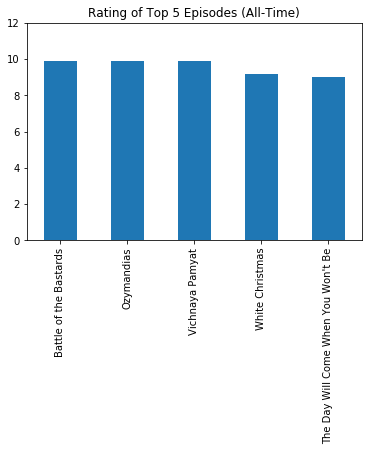

In [98]:
ax = top_50[:5].plot(x = 'title', y = 'avg_rating', kind = 'bar', legend = False, ylim = (0,12), title = 'Rating of Top 5 Episodes (All-Time)')
ax.set_xlabel('')

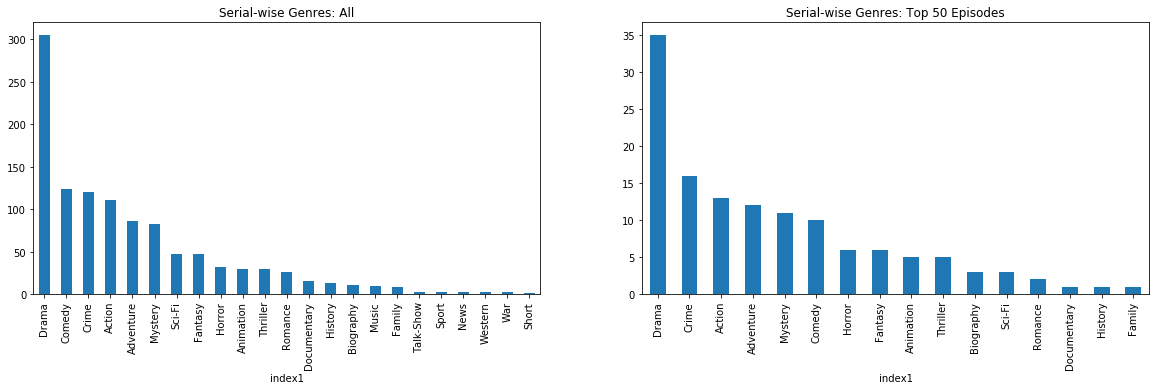

In [99]:
fig, ax = plt.subplots(figsize = (20,5), nrows = 1, ncols = 2)
gen_topdf.plot(x = 'index1', y = 'gen_sum', kind = 'bar', legend = False, title = 'Serial-wise Genres: All', ax = ax[0])
gen_top50.plot(x = 'index1', y = 'gen_sum', kind = 'bar', legend = False, title = 'Serial-wise Genres: Top 50 Episodes', ax = ax[1])

# Conclusion

- Drama is the most frequent genre in all episodes. Also, it is the most common genre among the top 50 episodes of all time.
- Though comedy is the second most common genre of all time, it is sixth most common in the top 50 episode list
- Crime, Action, Adventure, Mystery are the most common in the same order.

# Movies

In [100]:
all1.shape

(5979872, 7)

In [101]:
all_clean.shape

(1726750, 10)

In [102]:
all_clean.head(9)

,tconst,type,title,adult,start,runtime,genres,gen1,gen2,gen3
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",Animation,Comedy,Romance
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",Short,None,None
5,tt0000006,short,Chinese Opium Den,0,1894,1,Short,Short,Sport,None
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport",Documentary,Short,None
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short",Romance,None,None
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance,Documentary,Short,None
9,tt0000010,short,Exiting the Factory,0,1895,1,"Documentary,Short",Documentary,Short,None


In [130]:
all1.type.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [104]:
all1[all1['type'] == 'movie'].shape

(523208, 7)

In [105]:
movies = all1[all1['type'] == 'movie']

In [106]:
movies.head()

,tconst,type,title,adult,start,runtime,genres
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,0,1900,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,0,1905,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama"


movies dataset consists all the movies (1894-2019) present in the data set.

In [107]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523208 entries, 8 to 5979822
Data columns (total 7 columns):
tconst     523208 non-null object
type       523208 non-null object
title      523208 non-null object
adult      523208 non-null int64
start      523208 non-null object
runtime    523208 non-null object
genres     523208 non-null object
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [108]:
#movies = movies.drop('adult', axis = 1)
#movies.runtime = movies.runtime.astype(int)
#movies.info()

In [109]:
movies.start = movies.start.replace('\\N', 111111)
movies['start'] = movies.start.astype(int)


D:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
movies.start.min()

1894

### Selecting movies which have already released:

In [111]:
movies = movies[movies['start'] < 2019]

In [112]:
movies.start.max()

2018

Combining the rating data set with movies data set to get ratings for movies.

In [113]:
movies = movies.merge(rating, on = 'tconst', how = 'left')
movies.head()

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance,NaN,NaN
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,20,"Documentary,News,Sport",NaN,NaN
2,tt0000335,movie,Soldiers of the Cross,0,1900,\N,"Biography,Drama",NaN,NaN
3,tt0000502,movie,Bohemios,0,1905,100,\N,NaN,NaN
4,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama",NaN,NaN


In [114]:
movies_gen = split_genres(movies.genres)
movies_gen

,gen1,gen2,gen3
0,Romance,None,None
1,Documentary,News,Sport
2,Biography,Drama,None
3,\N,None,None
4,Biography,Crime,Drama
5,Drama,None,None
6,Drama,None,None
7,Drama,None,None
8,Drama,None,None
9,Adventure,Fantasy,None


In [115]:
movies = movies.join(movies_gen)
movies.head()

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance,NaN,NaN,Romance,None,None
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,20,"Documentary,News,Sport",NaN,NaN,Documentary,News,Sport
2,tt0000335,movie,Soldiers of the Cross,0,1900,\N,"Biography,Drama",NaN,NaN,Biography,Drama,None
3,tt0000502,movie,Bohemios,0,1905,100,\N,NaN,NaN,\N,None,None
4,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama",NaN,NaN,Biography,Crime,Drama


In [116]:
movies = movies.dropna(subset = ['avg_rating'])
movies.shape

(28694, 12)

In [117]:
movies.head()

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3
148,tt0002130,movie,Dante's Inferno,0,1911,68,"Adventure,Drama,Fantasy",7.1,1901.0,Adventure,Drama,Fantasy
264,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,0,1913,54,"Crime,Drama",6.9,1822.0,Crime,Drama,None
299,tt0003037,movie,Fantomas: The Man in Black,0,1913,61,"Crime,Drama",6.9,1270.0,Crime,Drama,None
366,tt0003419,movie,The Student of Prague,0,1913,85,"Drama,Fantasy,Horror",6.6,1583.0,Drama,Fantasy,Horror
425,tt0003643,movie,The Avenging Conscience: or 'Thou Shalt Not Kill',0,1914,78,"Crime,Drama,Horror",6.8,1027.0,Crime,Drama,Horror


Let us now split the genres column so that it is easier for analysis later.

Merging the movie_gen dataframe with movies dataframe

Like we did with the episode ratings, in order to find the movie ratings we will have to take into consideration the number of votes each movie has received.
#### Therefore, we will add a new column 'ratings' which is a product of avg_rating and votes column.

In [118]:
movies['ratings'] = movies['avg_rating']*movies['votes']
movies.head()

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3,ratings
148,tt0002130,movie,Dante's Inferno,0,1911,68,"Adventure,Drama,Fantasy",7.1,1901.0,Adventure,Drama,Fantasy,13497.1
264,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,0,1913,54,"Crime,Drama",6.9,1822.0,Crime,Drama,None,12571.8
299,tt0003037,movie,Fantomas: The Man in Black,0,1913,61,"Crime,Drama",6.9,1270.0,Crime,Drama,None,8763.0
366,tt0003419,movie,The Student of Prague,0,1913,85,"Drama,Fantasy,Horror",6.6,1583.0,Drama,Fantasy,Horror,10447.8
425,tt0003643,movie,The Avenging Conscience: or 'Thou Shalt Not Kill',0,1914,78,"Crime,Drama,Horror",6.8,1027.0,Crime,Drama,Horror,6983.6


In [119]:
movies_sort = movies.sort_values(by = 'ratings', ascending = False)
movies_sort.head()

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3,ratings
77888,tt0111161,movie,The Shawshank Redemption,0,1994,142,Drama,9.3,2108887.0,Drama,None,None,19612649.1
210755,tt0468569,movie,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2074851.0,Action,Crime,Drama,18673659.0
253522,tt1375666,movie,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1848482.0,Action,Adventure,Sci-Fi,16266641.6
91945,tt0137523,movie,Fight Club,0,1999,139,Drama,8.8,1685816.0,Drama,None,None,14835180.8
77725,tt0110912,movie,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,1649107.0,Crime,Drama,None,14677052.3


In [120]:
movies_top50 = movies_sort[:50]
movies_top50.shape

(50, 13)

### movies_sort and movies_top50 are the two cleaned data sets we will work on

## Top 50 movies of all time
These are the top 50 movies of all time according to IMDb data.

In [121]:
movies_top50

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3,ratings
77888,tt0111161,movie,The Shawshank Redemption,0,1994,142,Drama,9.3,2108887.0,Drama,None,None,19612649.1
210755,tt0468569,movie,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2074851.0,Action,Crime,Drama,18673659.0
253522,tt1375666,movie,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1848482.0,Action,Adventure,Sci-Fi,16266641.6
91945,tt0137523,movie,Fight Club,0,1999,139,Drama,8.8,1685816.0,Drama,None,None,14835180.8
77725,tt0110912,movie,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,1649107.0,Crime,Drama,None,14677052.3
77059,tt0109830,movie,Forrest Gump,0,1994,142,"Drama,Romance",8.8,1619695.0,Drama,Romance,None,14253316.0
104997,tt0167260,movie,The Lord of the Rings: The Return of the King,0,2003,201,"Adventure,Drama,Fantasy",8.9,1501057.0,Adventure,Drama,Fantasy,13359407.3
83120,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,0,2001,178,"Adventure,Drama,Fantasy",8.8,1516796.0,Adventure,Drama,Fantasy,13347804.8
50246,tt0068646,movie,The Godfather,0,1972,175,"Crime,Drama",9.2,1447777.0,Crime,Drama,None,13319548.4
89797,tt0133093,movie,The Matrix,0,1999,136,"Action,Sci-Fi",8.7,1516259.0,Action,Sci-Fi,None,13191453.3


In [122]:
movies_top50[:5]

,tconst,type,title,adult,start,runtime,genres,avg_rating,votes,gen1,gen2,gen3,ratings
77888,tt0111161,movie,The Shawshank Redemption,0,1994,142,Drama,9.3,2108887.0,Drama,None,None,19612649.1
210755,tt0468569,movie,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2074851.0,Action,Crime,Drama,18673659.0
253522,tt1375666,movie,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1848482.0,Action,Adventure,Sci-Fi,16266641.6
91945,tt0137523,movie,Fight Club,0,1999,139,Drama,8.8,1685816.0,Drama,None,None,14835180.8
77725,tt0110912,movie,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,1649107.0,Crime,Drama,None,14677052.3


Let us find the genres in top 50 movies

Text(0.5, 0, '')

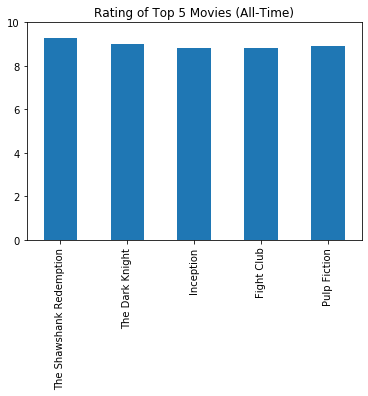

In [123]:
ax = movies_top50[:5].plot(x = 'title', y = 'avg_rating', kind = 'bar', legend = False, ylim = (0,10), title = 'Rating of Top 5 Movies (All-Time)')
ax.set_xlabel('')

Getting genres count for all movies

In [124]:
movies_sort_gen = gen_count(movies_sort.gen1, movies_sort.gen2, movies_sort.gen3)
movies_sort_gen

,index1,gen_sum
Drama,Drama,15597.0
Comedy,Comedy,10114.0
Romance,Romance,5186.0
Action,Action,5152.0
Crime,Crime,4606.0
Thriller,Thriller,4209.0
Horror,Horror,3589.0
Adventure,Adventure,3270.0
Mystery,Mystery,2073.0
Fantasy,Fantasy,1588.0


Getting genres count for top 50 movies

In [125]:
moviestop50_gen = gen_count(movies_top50.gen1, movies_top50.gen2, movies_top50.gen3)
moviestop50_gen

,index1,gen_sum
Drama,Drama,31.0
Adventure,Adventure,19.0
Action,Action,17.0
Crime,Crime,13.0
Fantasy,Fantasy,9.0
Sci-Fi,Sci-Fi,8.0
Thriller,Thriller,7.0
Mystery,Mystery,5.0
Biography,Biography,4.0
Animation,Animation,3.0


# Plotting: Movies
Plotting the genres for all movies and top 50 movies of all time.

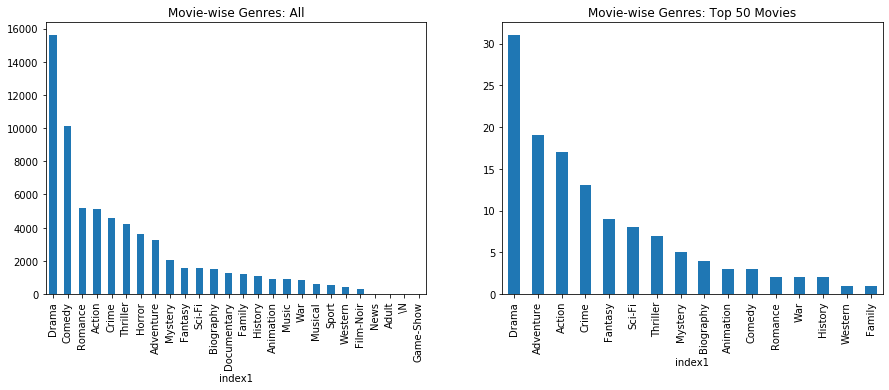

In [129]:
fig, ax = plt.subplots(figsize = (15,5), nrows = 1, ncols = 2)
movies_sort_gen.plot(x = 'index1', y = 'gen_sum', kind = 'bar', legend = False, title = 'Movie-wise Genres: All', ax =ax[0])
moviestop50_gen.plot(x = 'index1', y = 'gen_sum', kind = 'bar', legend = False, title = 'Movie-wise Genres: Top 50 Movies', ax = ax[1])

# Conclusion

- Drama is the most common genre among all movies. Also, it is the most common genre among the top 50 episodes of all time.
- Though comedy is the second most common genre of all time, it is 11th most common in the top 50 movie list
- Action, Adventure, Crime in that order are the most common after drama.